# Lab 8

# Visualization with Matplotlib

In this lab, you'll be working through Chapter 4 to get an introduction to the data visualization and analysis package for Python, Matplotlib. This notebook is made up of two sections.

- Section 1: Work through the code samples in Chapter 4
- Section 2: Exercises

# Section 1: Code Practice

In this section, you will be reading through the various chapter sections and **typing out**/running the code samples given in the sections. The purpose of this is for you to practice using Jupyter to run Python code as well as learn about the functionality available to you in both IPython and Jupyter.

**Do not copy/paste the code**. Type it out. Don't go zen, either. Pay attention to the meaning of what you are typing. Pay attention to the parameters and the types of arguments. Find the similarities and differences among the various object APIs. 

---

##### Executing code in Jupyter

When typing and executing code in Jupyter, it is helpful to know the various keyboard shortcuts. You can find the full list of these by clicking **Help &rarr; Keyboard Shortcuts** in the menu. However, the two most useful keyboard shortcuts are:

- `Shift-Enter`: Execute the current cell and advance to the next cell. This will create one if none exists, but if a cell exists below your current cell, a new cell will **not** be created.
- `Alt-Enter`: Execute the current cell and **create** a new cell below.
- `Control-Enter`: Execute the current cell without advancing to the next cell

When writing your code, you will be using these two commands to make sure input/output (`In`/`Out`) is consistent with what is found in the chapter. If you create a cell by mistake, you can always go to **Edit &rarr; Delete Cells** to remove it.

#### Purpose of Section 1

Your purpose in this section is 

- **Type out** the code examples from the chapter (do not copy and paste)
- **Run** them
- **Check** to **make sure** you are getting the same results as what is contained in the chapter

---




## Multiple Subplots

[Chapter link](https://nbviewer.jupyter.org/urls/bitbucket.org/dogwynn/pythondatasciencehandbook/raw/master/notebooks/04.08-Multiple-Subplots.ipynb)

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8-whitegrid')
import numpy as np

### `plt.axes`: Subplots by Hand

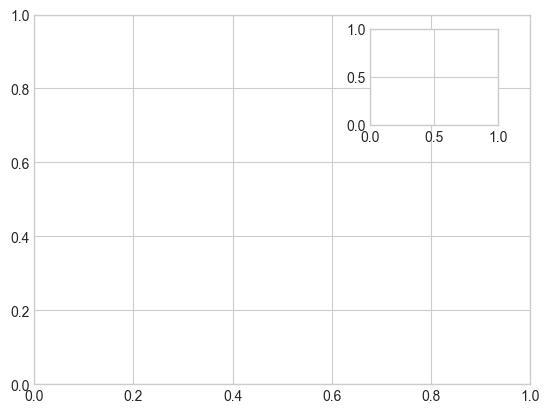

In [3]:
ax1 = plt.axes()  # standard axes
ax2 = plt.axes([0.65, 0.65, 0.2, 0.2])

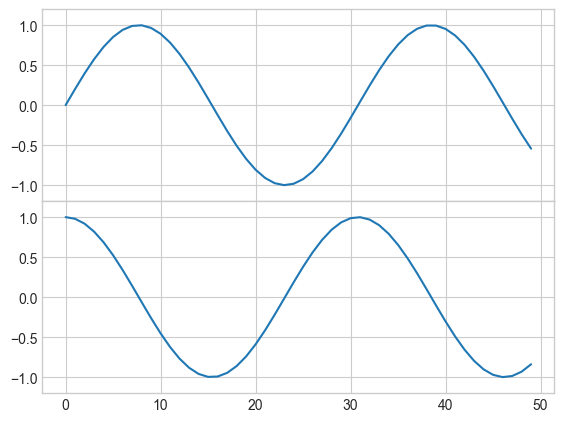

In [4]:
fig = plt.figure()
ax1 = fig.add_axes([0.1, 0.5, 0.8, 0.4],
                   xticklabels=[], ylim=(-1.2, 1.2))
ax2 = fig.add_axes([0.1, 0.1, 0.8, 0.4],
                   ylim=(-1.2, 1.2))

x = np.linspace(0, 10)
ax1.plot(np.sin(x))
ax2.plot(np.cos(x));

### `plt.subplot`: Simple Grids of Subplots

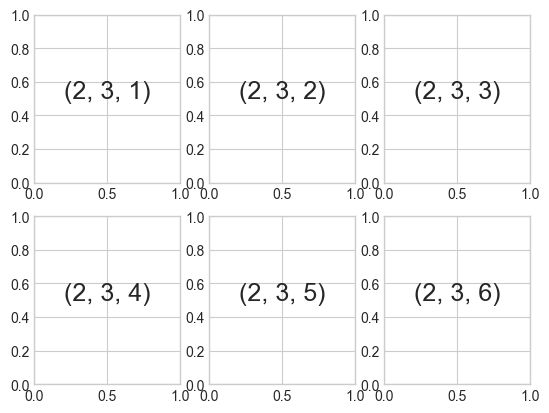

In [5]:
for i in range(1, 7):
    plt.subplot(2, 3, i)
    plt.text(0.5, 0.5, str((2, 3, i)),
             fontsize=18, ha='center')

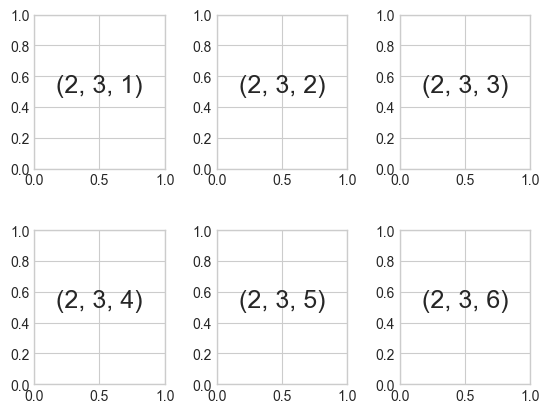

In [6]:
fig = plt.figure()
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i in range(1, 7):
    ax = fig.add_subplot(2, 3, i)
    ax.text(0.5, 0.5, str((2, 3, i)),
           fontsize=18, ha='center')

### `plot.subplots`: The Whole Grid in One Go

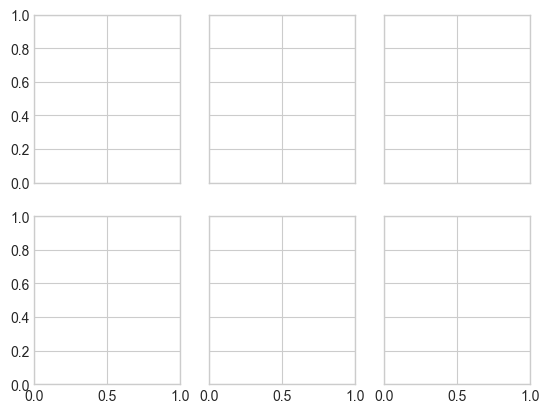

In [7]:
fig, ax = plt.subplots(2, 3, sharex='col', sharey='row')

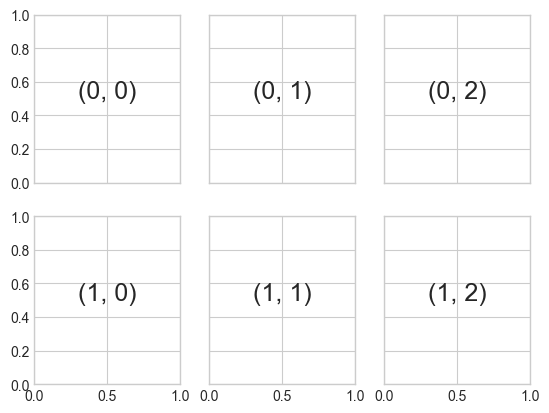

In [8]:
# axes are in a two-dimensional array, indexed by [row, col]
for i in range(2):
    for j in range(3):
        ax[i, j].text(0.5, 0.5, str((i, j)),
                      fontsize=18, ha='center')
fig

### `plt.GridSpec`: More Complicated Arrangements

In [ ]:
grid = plt.GridSpec(2, 3, wspace=0.4, hspace=0.3)

In [ ]:
plt.subplot(grid[0, 0])
plt.subplot(grid[0, 1:])
plt.subplot(grid[1, :2])
plt.subplot(grid[1, 2]);

In [ ]:
# Create some normally distributed data
mean = [0, 0]
cov = [[1, 1], [1, 2]]
x, y = np.random.multivariate_normal(mean, cov, 3000).T

# Set up the axes with gridspec
fig = plt.figure(figsize=(6, 6))
grid = plt.GridSpec(4, 4, hspace=0.2, wspace=0.2)
main_ax = fig.add_subplot(grid[:-1, 1:])
y_hist = fig.add_subplot(grid[:-1, 0], xticklabels=[], sharey=main_ax)
x_hist = fig.add_subplot(grid[-1, 1:], yticklabels=[], sharex=main_ax)

# scatter points on the main axes
main_ax.plot(x, y, 'ok', markersize=3, alpha=0.2)

# histogram on the attached axes
x_hist.hist(x, 40, histtype='stepfilled',
            orientation='vertical', color='gray')
x_hist.invert_yaxis()

y_hist.hist(y, 40, histtype='stepfilled',
            orientation='horizontal', color='gray')
y_hist.invert_xaxis()

---

## Text and Annotation

[Chapter link](https://nbviewer.jupyter.org/urls/bitbucket.org/dogwynn/pythondatasciencehandbook/raw/master/notebooks/04.09-Text-and-Annotation.ipynb)

In [14]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl
plt.style.use('seaborn-v0_8-whitegrid')
import numpy as np
import pandas as pd

### Example: Effect of Holidays on US Births

Load births data using the following:

```python
births = pd.read_csv('https://belhavencs.nyc3.digitaloceanspaces.com/csc311/births.csv')
```

In [15]:
births = pd.read_csv('https://belhavencs.nyc3.digitaloceanspaces.com/csc311/births.csv')

In [44]:
quartiles = np.percentile(births['births'], [25, 50, 75])
mu, sig = quartiles[1], 0.74 * (quartiles[2] - quartiles[0])
births = births.query('(births > @mu - 5 * @sig) & (births < @mu + 5 * @sig)')

births['day'] = births['day'].astype(int)

births.index = pd.to_datetime(10000 * births.year +
                              100 * births.month +
                              births.day, format='%Y%m%d')
births_by_date = births.pivot_table('births',
                                    [births.index.month, births.index.day])
births_by_date.index = [pd.to_datetime(2012, month, day)
                        for (month, day) in births_by_date.index]

ValueError: Length mismatch: Expected axis has 366 elements, new values have 14610 elements

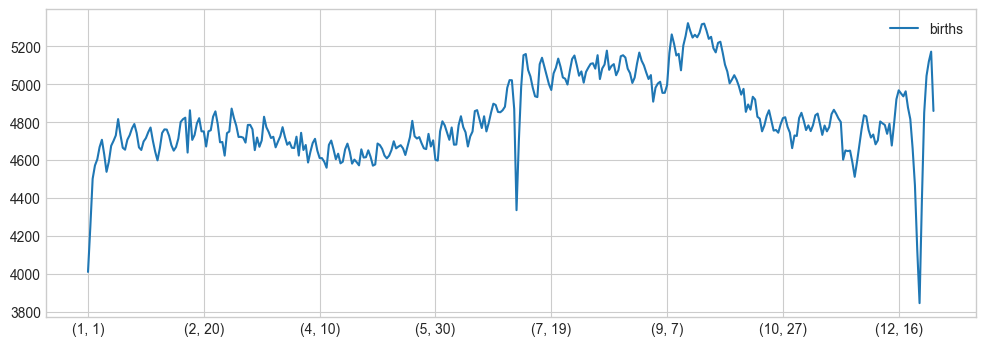

In [28]:
fig, ax = plt.subplots(figsize=(12, 4))
births_by_date.plot(ax=ax);

### Transforms and Text Position

In [34]:
fig, ax = plt.subplots(figsize=(12, 4))
births_by_date.plot(ax=ax)

# Add labels to the plot
style = dict(size=10, color='gray')




# Label the axes
ax.set(title='USA births by day of year (1969-1988)',
       ylabel='average daily births')

# Format the x axis with centered month labels
ax.xaxis.set_major_locator(mpl.dates.MonthLocator())
ax.xaxis.set_minor_locator(mpl.dates.MonthLocator(bymonthday=15))
ax.xaxis.set_major_formatter(plt.NullFormatter())
ax.xaxis.set_minor_formatter(mpl.dates.DateFormatter('%h'));

Error in callback <function _draw_all_if_interactive at 0x0000015E6736BF40> (for post_execute), with arguments args (),kwargs {}:


ConversionError: Failed to convert value(s) to axis units: '2012-1-1'

ConversionError: Failed to convert value(s) to axis units: '2012-1-1'

<Figure size 1200x400 with 1 Axes>

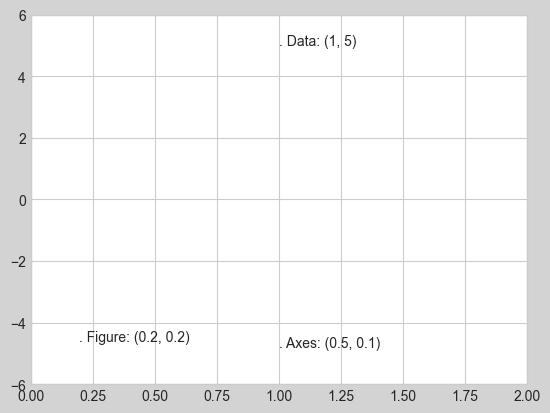

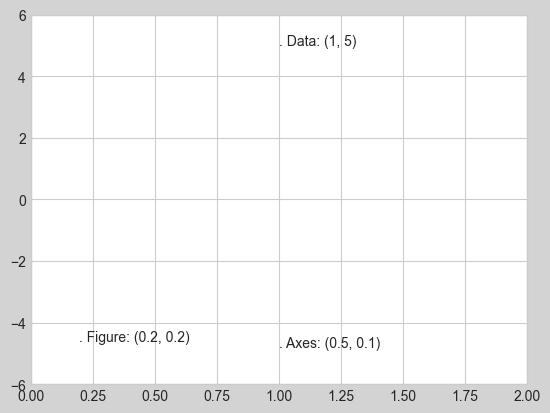

In [25]:
fig, ax = plt.subplots(facecolor='lightgray')
ax.axis([0, 10, 0, 10])

# transform=ax.transData is the default, but we'll specify it anyway
ax.text(1, 5, ". Data: (1, 5)", transform=ax.transData)
ax.text(0.5, 0.1, ". Axes: (0.5, 0.1)", transform=ax.transAxes)
ax.text(0.2, 0.2, ". Figure: (0.2, 0.2)", transform=fig.transFigure);
ax.set_xlim(0, 2)
ax.set_ylim(-6, 6)
fig

### Arrows and Annotation

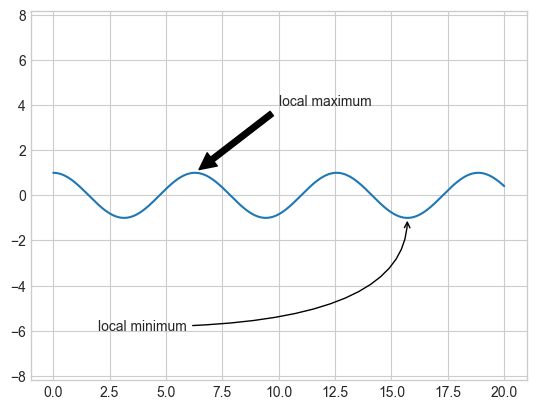

In [40]:
%matplotlib inline

fig, ax = plt.subplots()

x = np.linspace(0, 20, 1000)
ax.plot(x, np.cos(x))
ax.axis('equal')

ax.annotate('local maximum', xy=(6.28, 1), xytext=(10, 4),
            arrowprops=dict(facecolor='black', shrink=0.05))

ax.annotate('local minimum', xy=(5 * np.pi, -1), xytext=(2, -6),
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="angle3,angleA=0,angleB=-90"));

In [41]:
fig, ax = plt.subplots(figsize=(12, 4))
births_by_date.plot(ax=ax)

# Add labels to the plot
ax.annotate("New Year's Day", xy=('2012-1-1', 4100),  xycoords='data',
            xytext=(50, -30), textcoords='offset points',
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="arc3,rad=-0.2"))

ax.annotate("Independence Day", xy=('2012-7-4', 4250),  xycoords='data',
            bbox=dict(boxstyle="round", fc="none", ec="gray"),
            xytext=(10, -40), textcoords='offset points', ha='center',
            arrowprops=dict(arrowstyle="->"))

ax.annotate('Labor Day', xy=('2012-9-4', 4850), xycoords='data', ha='center',
            xytext=(0, -20), textcoords='offset points')
ax.annotate('', xy=('2012-9-1', 4850), xytext=('2012-9-7', 4850),
            xycoords='data', textcoords='data',
            arrowprops={'arrowstyle': '|-|,widthA=0.2,widthB=0.2', })

ax.annotate('Halloween', xy=('2012-10-31', 4600),  xycoords='data',
            xytext=(-80, -40), textcoords='offset points',
            arrowprops=dict(arrowstyle="fancy",
                            fc="0.6", ec="none",
                            connectionstyle="angle3,angleA=0,angleB=-90"))

ax.annotate('Thanksgiving', xy=('2012-11-25', 4500),  xycoords='data',
            xytext=(-120, -60), textcoords='offset points',
            bbox=dict(boxstyle="round4,pad=.5", fc="0.9"),
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="angle,angleA=0,angleB=80,rad=20"))


ax.annotate('Christmas', xy=('2012-12-25', 3850),  xycoords='data',
             xytext=(-30, 0), textcoords='offset points',
             size=13, ha='right', va="center",
             bbox=dict(boxstyle="round", alpha=0.1),
             arrowprops=dict(arrowstyle="wedge,tail_width=0.5", alpha=0.1));

# Label the axes
ax.set(title='USA births by day of year (1969-1988)',
       ylabel='average daily births')

# Format the x axis with centered month labels
ax.xaxis.set_major_locator(mpl.dates.MonthLocator())
ax.xaxis.set_minor_locator(mpl.dates.MonthLocator(bymonthday=15))
ax.xaxis.set_major_formatter(plt.NullFormatter())
ax.xaxis.set_minor_formatter(mpl.dates.DateFormatter('%h'));

ax.set_ylim(3600, 5400);

Error in callback <function _draw_all_if_interactive at 0x0000015E6736BF40> (for post_execute), with arguments args (),kwargs {}:


ConversionError: Failed to convert value(s) to axis units: '2012-1-1'

ConversionError: Failed to convert value(s) to axis units: '2012-1-1'

<Figure size 1200x400 with 1 Axes>

---

## Customizing Ticks

[Chapter link](https://nbviewer.jupyter.org/urls/bitbucket.org/dogwynn/pythondatasciencehandbook/raw/master/notebooks/04.10-Customizing-Ticks.ipynb)

### Major and Minor Ticks

In [45]:
import matplotlib.pyplot as plt
plt.style.use('classic')
%matplotlib inline
import numpy as np

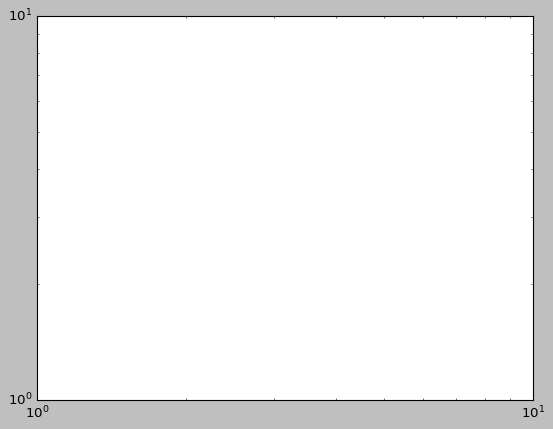

In [46]:
ax = plt.axes(xscale='log', yscale='log')
ax.grid();

In [47]:
print(ax.xaxis.get_major_locator())
print(ax.xaxis.get_minor_locator())

In [48]:
print(ax.xaxis.get_major_formatter())
print(ax.xaxis.get_minor_formatter())

### Hiding Ticks or Labels

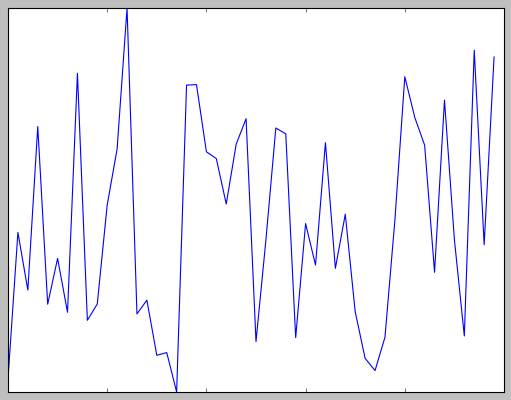

In [49]:
ax = plt.axes()
ax.plot(np.random.rand(50))

ax.yaxis.set_major_locator(plt.NullLocator())
ax.xaxis.set_major_formatter(plt.NullFormatter())

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to C:\Users\jerem\scikit_learn_data


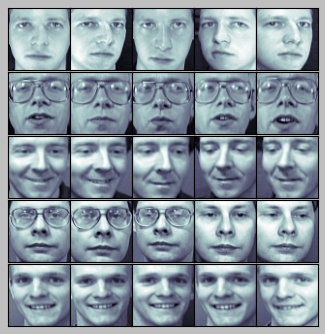

In [50]:
fig, ax = plt.subplots(5, 5, figsize=(5, 5))
fig.subplots_adjust(hspace=0, wspace=0)

# Get some face data from scikit-learn
from sklearn.datasets import fetch_olivetti_faces
faces = fetch_olivetti_faces().images

for i in range(5):
    for j in range(5):
        ax[i, j].xaxis.set_major_locator(plt.NullLocator())
        ax[i, j].yaxis.set_major_locator(plt.NullLocator())
        ax[i, j].imshow(faces[10 * i + j], cmap="bone")

### Reducing or Increasing the Number of Ticks

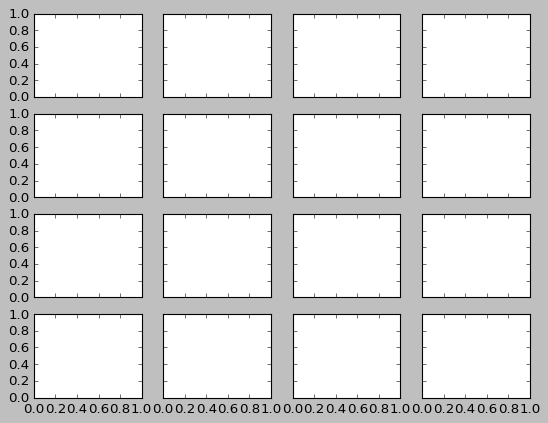

In [51]:
fig, ax = plt.subplots(4, 4, sharex=True, sharey=True)

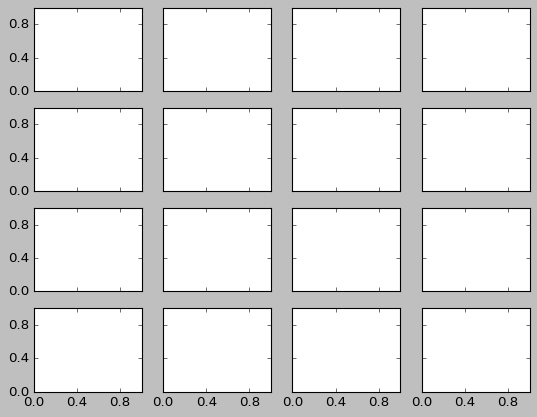

In [52]:
# For every axis, set the x and y major locator
for axi in ax.flat:
    axi.xaxis.set_major_locator(plt.MaxNLocator(3))
    axi.yaxis.set_major_locator(plt.MaxNLocator(3))
fig

### Fancy Tick Formats

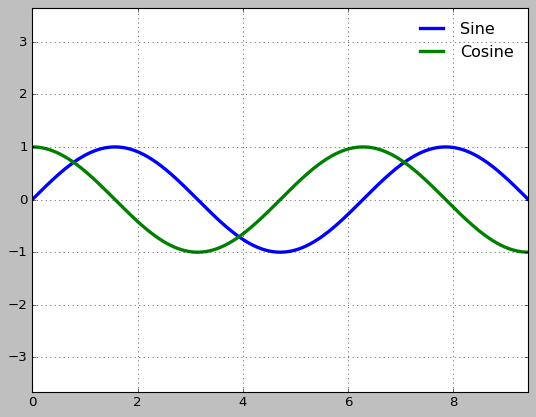

In [53]:
# Plot a sine and cosine curve
fig, ax = plt.subplots()
x = np.linspace(0, 3 * np.pi, 1000)
ax.plot(x, np.sin(x), lw=3, label='Sine')
ax.plot(x, np.cos(x), lw=3, label='Cosine')

# Set up grid, legend, and limits
ax.grid(True)
ax.legend(frameon=False)
ax.axis('equal')
ax.set_xlim(0, 3 * np.pi);

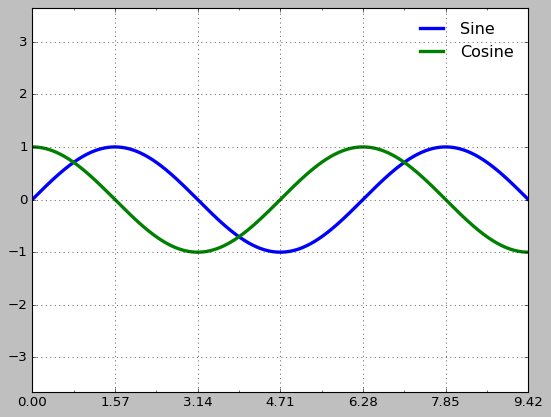

In [54]:
ax.xaxis.set_major_locator(plt.MultipleLocator(np.pi / 2))
ax.xaxis.set_minor_locator(plt.MultipleLocator(np.pi / 4))
fig

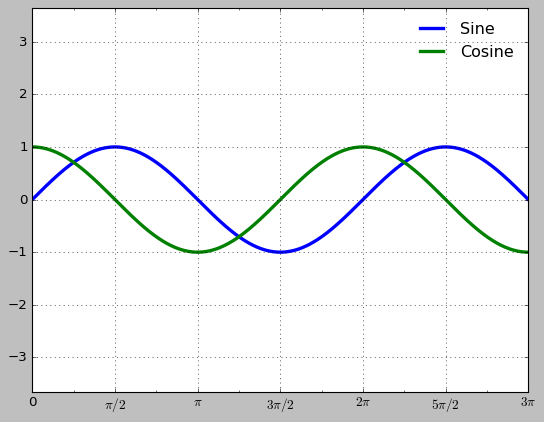

In [55]:
def format_func(value, tick_number):
    # find number of multiples of pi/2
    N = int(np.round(2 * value / np.pi))
    if N == 0:
        return "0"
    elif N == 1:
        return r"$\pi/2$"
    elif N == 2:
        return r"$\pi$"
    elif N % 2 > 0:
        return r"${0}\pi/2$".format(N)
    else:
        return r"${0}\pi$".format(N // 2)

ax.xaxis.set_major_formatter(plt.FuncFormatter(format_func))
fig

---

## Customizing Matplotlib: Configurations and Stylesheets

[Chapter link](https://nbviewer.jupyter.org/urls/bitbucket.org/dogwynn/pythondatasciencehandbook/raw/master/notebooks/04.11-Settings-and-Stylesheets.ipynb)

### Plot Customization by Hand

In [56]:
import matplotlib.pyplot as plt
plt.style.use('classic')
import numpy as np

%matplotlib inline

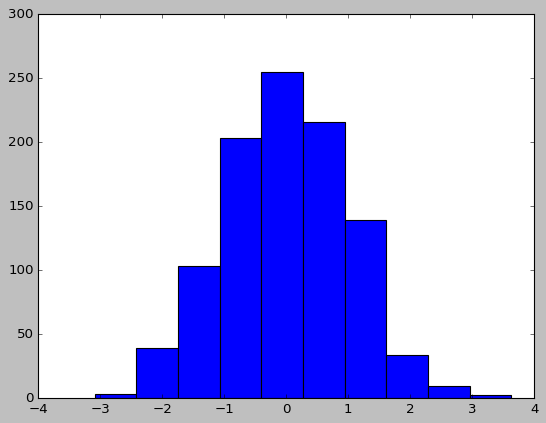

In [57]:
x = np.random.randn(1000)
plt.hist(x);

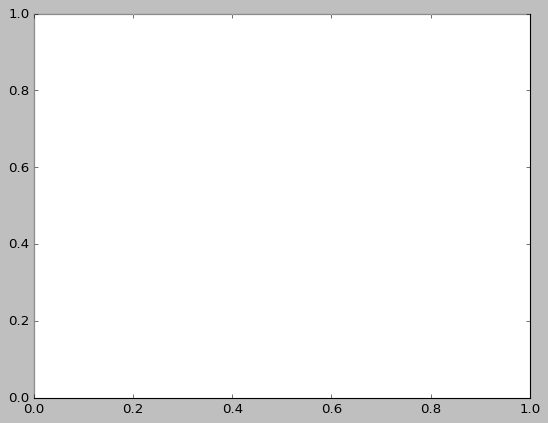

In [60]:
# use a gray background
ax.set_axisbelow(True)

# draw solid white grid lines
plt.grid(color='w', linestyle='solid')

# hide axis spines
for spine in ax.spines.values():
    spine.set_visible(False)
    
# hide top and right ticks
ax.xaxis.tick_bottom()
ax.yaxis.tick_left()

# lighten ticks and labels
ax.tick_params(colors='gray', direction='out')
for tick in ax.get_xticklabels():
    tick.set_color('gray')
for tick in ax.get_yticklabels():
    tick.set_color('gray')
    
# control face and edge color of histogram
ax.hist(x, edgecolor='#E6E6E6', color='#EE6666');

### Changing the Defaults: `rcParams`

In [61]:
IPython_default = plt.rcParams.copy()

In [62]:
from matplotlib import cycler
colors = cycler('color',
                ['#EE6666', '#3388BB', '#9988DD',
                 '#EECC55', '#88BB44', '#FFBBBB'])
plt.rc('axes', facecolor='#E6E6E6', edgecolor='none',
       axisbelow=True, grid=True, prop_cycle=colors)
plt.rc('grid', color='w', linestyle='solid')
plt.rc('xtick', direction='out', color='gray')
plt.rc('ytick', direction='out', color='gray')
plt.rc('patch', edgecolor='#E6E6E6')
plt.rc('lines', linewidth=2)

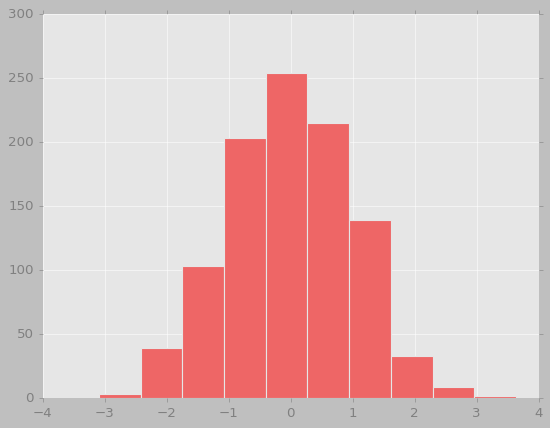

In [63]:
plt.hist(x);

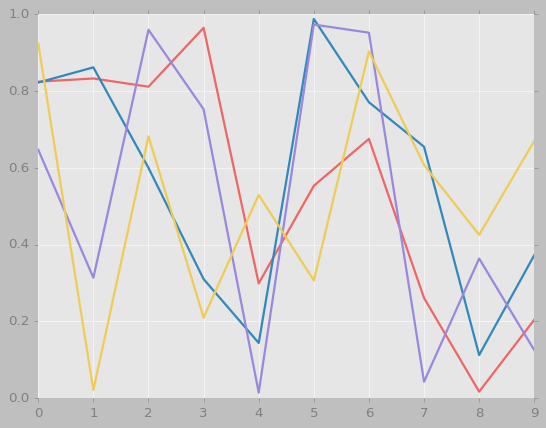

In [64]:
for i in range(4):
    plt.plot(np.random.rand(10))

### Stylesheets

In [65]:
plt.style.available[:5]

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh']

In [66]:
def hist_and_lines():
    np.random.seed(0)
    fig, ax = plt.subplots(1, 2, figsize=(11, 4))
    ax[0].hist(np.random.randn(1000))
    for i in range(3):
        ax[1].plot(np.random.rand(10))
    ax[1].legend(['a', 'b', 'c'], loc='lower left')

#### Default style

In [67]:
# reset rcParams
plt.rcParams.update(IPython_default);

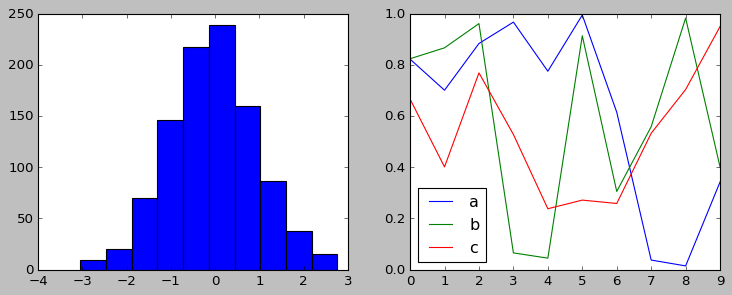

In [68]:
hist_and_lines()

#### FiveThirtyEight style

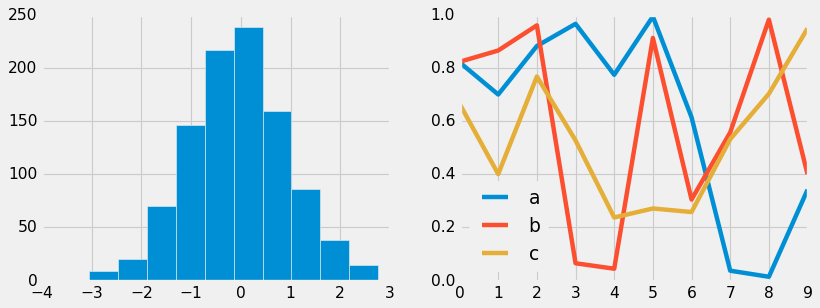

In [69]:
with plt.style.context('fivethirtyeight'):
    hist_and_lines()

#### ggplot

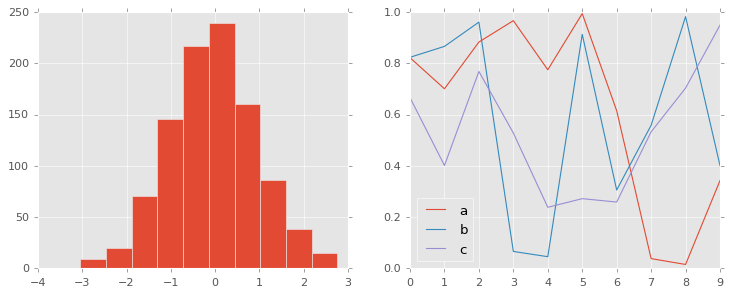

In [70]:
with plt.style.context('ggplot'):
    hist_and_lines()

#### Baysian Methods for Hackers style

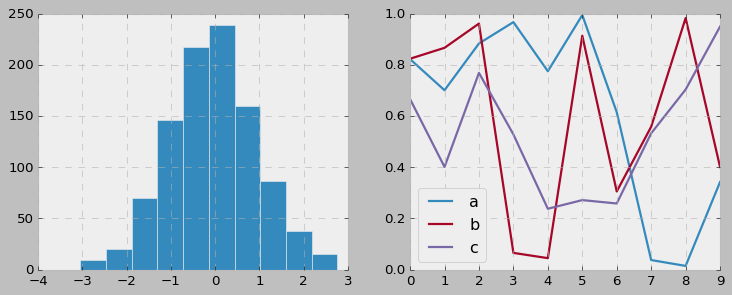

In [71]:
with plt.style.context('bmh'):
    hist_and_lines()

#### Dark background

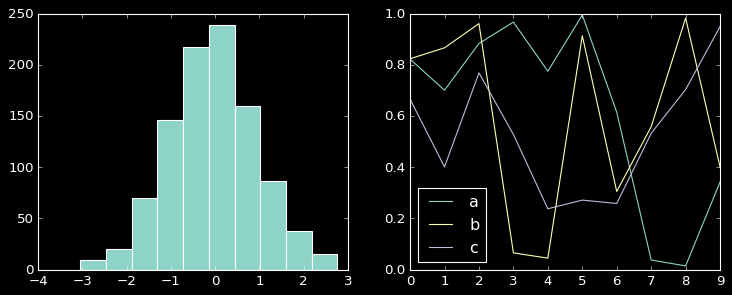

In [72]:
with plt.style.context('dark_background'):
    hist_and_lines()

#### Grayscale

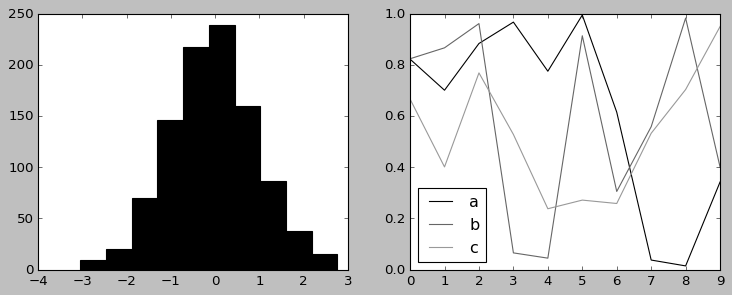

In [73]:
with plt.style.context('grayscale'):
    hist_and_lines()

#### Seaborn style

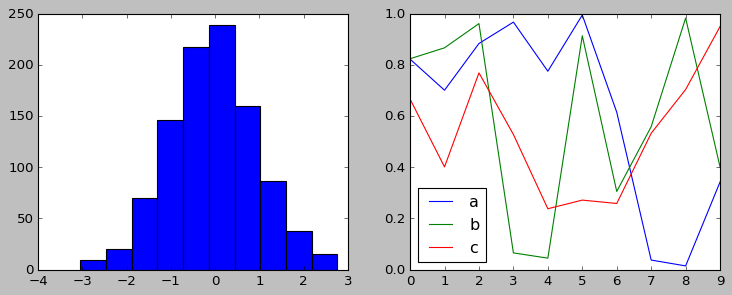

In [74]:
import seaborn
hist_and_lines()

---

## Three-Dimensional Plotting in Matplotlib

[Chapter link](https://nbviewer.jupyter.org/urls/bitbucket.org/dogwynn/pythondatasciencehandbook/raw/master/notebooks/04.12-Three-Dimensional-Plotting.ipynb)

In [1]:
from mpl_toolkits import mplot3d

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

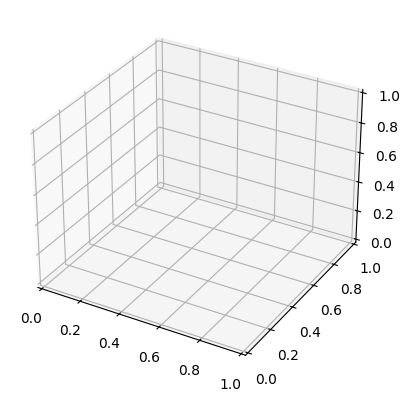

In [3]:
fig = plt.figure()
ax = plt.axes(projection='3d')

### Three-dimensional Points and Lines

In [ ]:
ax = plt.axes(projection='3d')

# Data for a three-dimensional line
zline = np.linspace(0, 15, 1000)
xline = np.sin(zline)
yline = np.cos(zline)
ax.plot3D(xline, yline, zline, 'gray')

# Data for three-dimensional scattered points
zdata = 15 * np.random.random(100)
xdata = np.sin(zdata) + 0.1 * np.random.randn(100)
ydata = np.cos(zdata) + 0.1 * np.random.randn(100)
ax.scatter3D(xdata, ydata, zdata, c=zdata, cmap='Greens');

### Three-dimensional Contour Plots

In [4]:
def f(x, y):
    return np.sin(np.sqrt(x ** 2 + y ** 2))

x = np.linspace(-6, 6, 30)
y = np.linspace(-6, 6, 30)

X, Y = np.meshgrid(x, y)
Z = f(X, Y)

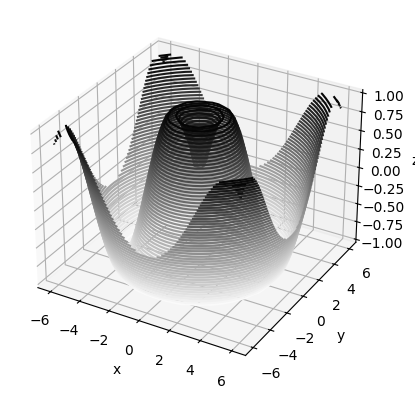

In [5]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(X, Y, Z, 50, cmap='binary')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z');

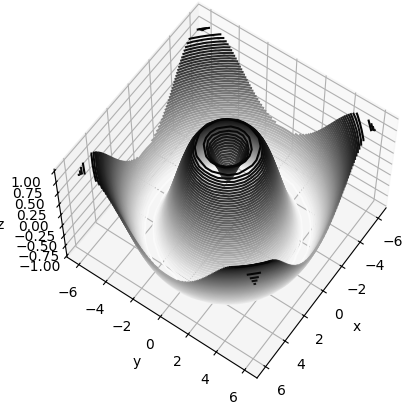

In [6]:
ax.view_init(60, 35)
fig

### Wireframes and Surface Plots

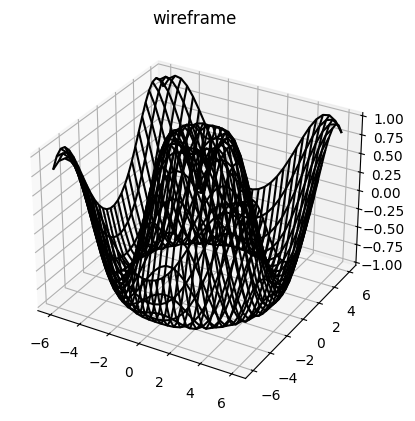

In [7]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_wireframe(X, Y, Z, color='black')
ax.set_title('wireframe');

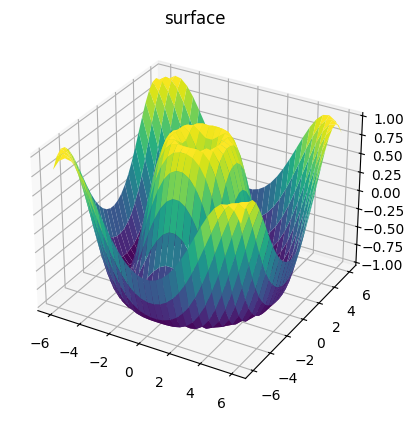

In [8]:
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1,
                cmap='viridis', edgecolor='none')
ax.set_title('surface');

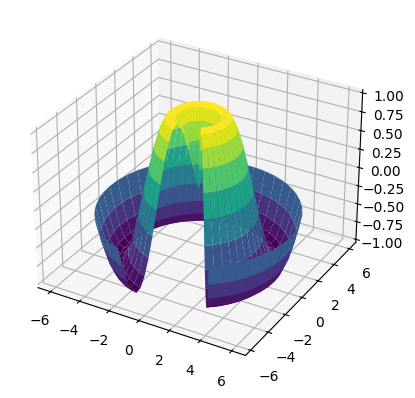

In [9]:
r = np.linspace(0, 6, 20)
theta = np.linspace(-0.9 * np.pi, 0.8 * np.pi, 40)
r, theta = np.meshgrid(r, theta)

X = r * np.sin(theta)
Y = r * np.cos(theta)
Z = f(X, Y)

ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1,
                cmap='viridis', edgecolor='none');

### Surface Triangulations

In [10]:
theta = 2 * np.pi * np.random.random(1000)
r = 6 * np.random.random(1000)
x = np.ravel(r * np.sin(theta))
y = np.ravel(r * np.cos(theta))
z = f(x, y)

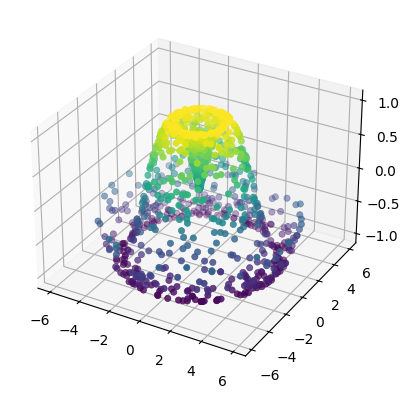

In [11]:
ax = plt.axes(projection='3d')
ax.scatter(x, y, z, c=z, cmap='viridis', linewidth=0.5);

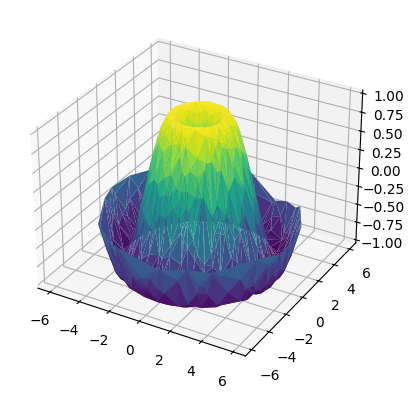

In [12]:
ax = plt.axes(projection='3d')
ax.plot_trisurf(x, y, z,
                cmap='viridis', edgecolor='none');

#### Example: Visualizing a Möbius strip

In [13]:
theta = np.linspace(0, 2 * np.pi, 30)
w = np.linspace(-0.25, 0.25, 8)
w, theta = np.meshgrid(w, theta)

In [14]:
phi = 0.5 * theta

In [15]:
# radius in x-y plane
r = 1 + w * np.cos(phi)

x = np.ravel(r * np.cos(theta))
y = np.ravel(r * np.sin(theta))
z = np.ravel(w * np.sin(phi))

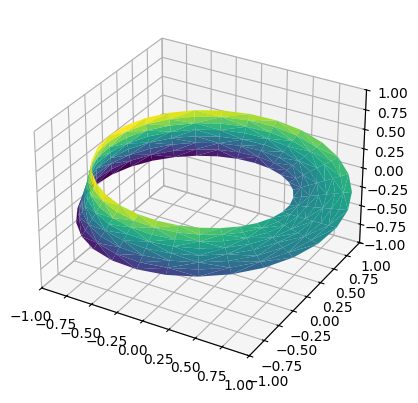

In [16]:
# triangulate in the underlying parametrization
from matplotlib.tri import Triangulation
tri = Triangulation(np.ravel(w), np.ravel(theta))

ax = plt.axes(projection='3d')
ax.plot_trisurf(x, y, z, triangles=tri.triangles,
                cmap='viridis', linewidths=0.2);

ax.set_xlim(-1, 1); ax.set_ylim(-1, 1); ax.set_zlim(-1, 1);

---

## Geographic Data with Basemap

[Chapter link](https://nbviewer.jupyter.org/urls/bitbucket.org/dogwynn/pythondatasciencehandbook/raw/master/notebooks/04.13-Geographic-Data-With-Basemap.ipynb)

In [23]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import Basemap

ImportError: cannot import name 'Basemap' from 'mpl_toolkits' (unknown location)

In [ ]:
plt.figure(figsize=(8, 8))
m = Basemap(projection='ortho', resolution=None, lat_0=50, lon_0=-100)
m.bluemarble(scale=0.5);

In [ ]:
fig = plt.figure(figsize=(8, 8))
m = Basemap(projection='lcc', resolution=None,
            width=8E6, height=8E6, 
            lat_0=45, lon_0=-100,)
m.etopo(scale=0.5, alpha=0.5)

# Map (long, lat) to (x, y) for plotting
x, y = m(-122.3, 47.6)
plt.plot(x, y, 'ok', markersize=5)
plt.text(x, y, ' Seattle', fontsize=12);

### Map Projections

#### Cylindrical projections

#### Pseudo-cylindrical projections

#### Perspective projections

#### Conic projections

### Drawing a Map Background

### Plotting Data on Maps

### Example: California Cities

Load data using the following:

```python
cities = pd.read_csv("https://belhavencs.nyc3.digitaloceanspaces.com/csc311/california_cities.csv")
```

### Example: Surface Tempurature Data

To save a local copy of temperature data:

```python
import gzip
import urllib.request
from pathlib import Path
path = Path('gistemp250.nc')
if not path.exists():
    response = urllib.request.urlopen('https://belhavencs.nyc3.digitaloceanspaces.com/csc311/gistemp250.nc.gz')
    path.write_bytes(gzip.decompress(response.read()))
```

---

## Visualization with Seaborn

[Chapter link](https://nbviewer.jupyter.org/urls/bitbucket.org/dogwynn/pythondatasciencehandbook/raw/master/notebooks/04.14-Visualization-With-Seaborn.ipynb)

### Seaborn Versus Matplotlib

In [24]:
import matplotlib.pyplot as plt
plt.style.use('classic')
%matplotlib inline
import numpy as np
import pandas as pd

In [25]:
# Create some data
rng = np.random.RandomState(0)
x = np.linspace(0, 10, 500)
y = np.cumsum(rng.randn(500, 6), 0)

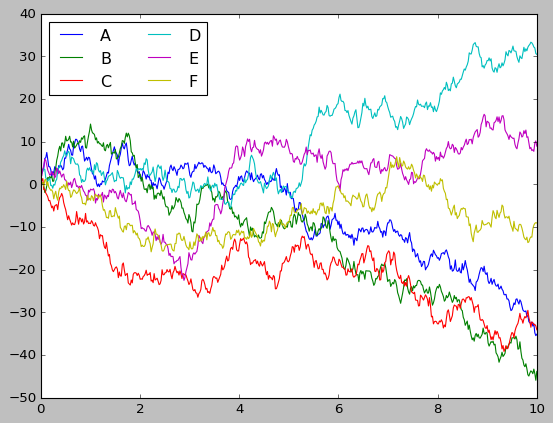

In [26]:
# Plot the data with Matplotlib defaults
plt.plot(x, y)
plt.legend('ABCDEF', ncol=2, loc='upper left');

In [27]:
import seaborn as sns
sns.set()

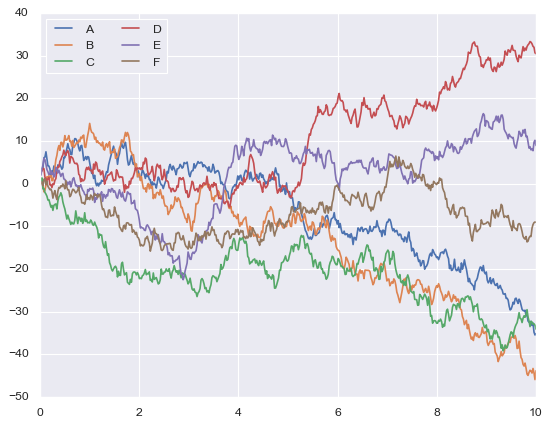

In [28]:
# same plotting code as above!
plt.plot(x, y)
plt.legend('ABCDEF', ncol=2, loc='upper left');

### Exploring Seaborn Plots

#### Histograms, KDE, and densities

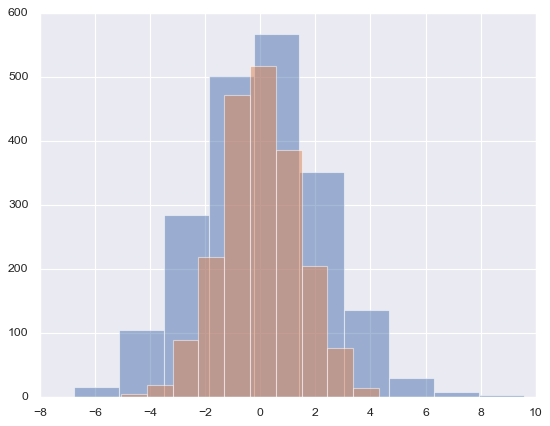

In [30]:
data = np.random.multivariate_normal([0, 0], [[5, 2], [2, 2]], size=2000)
data = pd.DataFrame(data, columns=['x', 'y'])

for col in 'xy':
    plt.hist(data[col], alpha=0.5)

C:\Users\jerem\AppData\Local\Temp\ipykernel_8496\4143655892.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[col], shade=True)
C:\Users\jerem\AppData\Local\Temp\ipykernel_8496\4143655892.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[col], shade=True)


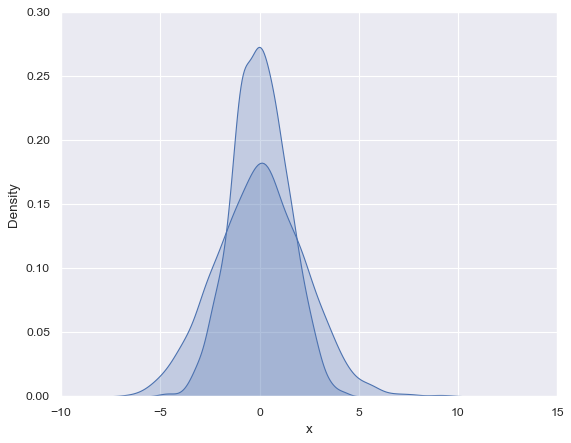

In [31]:
for col in 'xy':
    sns.kdeplot(data[col], shade=True)

C:\Users\jerem\AppData\Local\Temp\ipykernel_8496\923662334.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['x'])
C:\Users\jerem\AppData\Local\Temp\ipykernel_8496\923662334.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['y']);


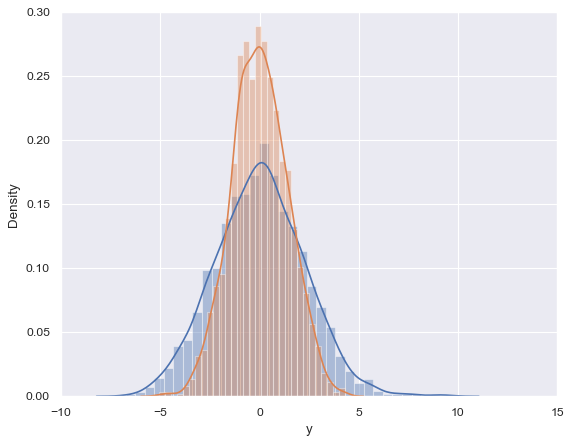

In [32]:
sns.distplot(data['x'])
sns.distplot(data['y']);

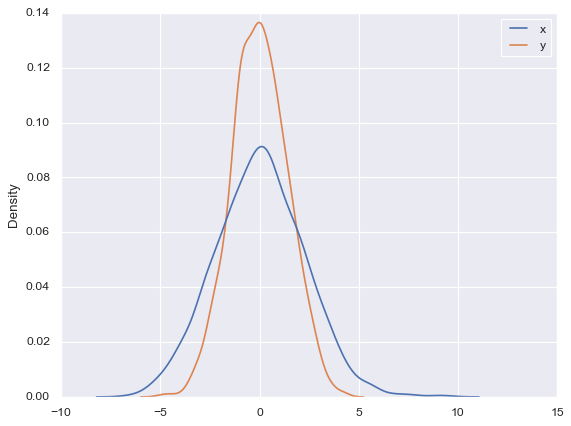

In [33]:
sns.kdeplot(data);

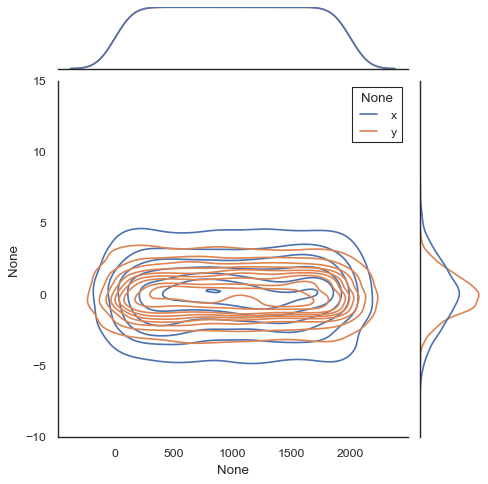

In [36]:
with sns.axes_style('white'):
    sns.jointplot(data, kind='kde');

AttributeError: PolyCollection.set() got an unexpected keyword argument 'hue'

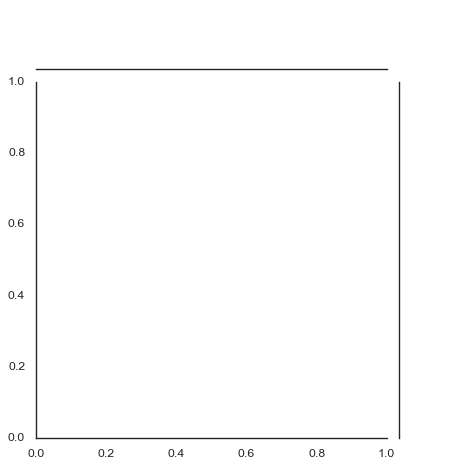

In [37]:
with sns.axes_style('white'):
    sns.jointplot(data, kind='hex')

#### Pair plots

In [38]:
iris = sns.load_dataset("iris")
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


C:\Users\jerem\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


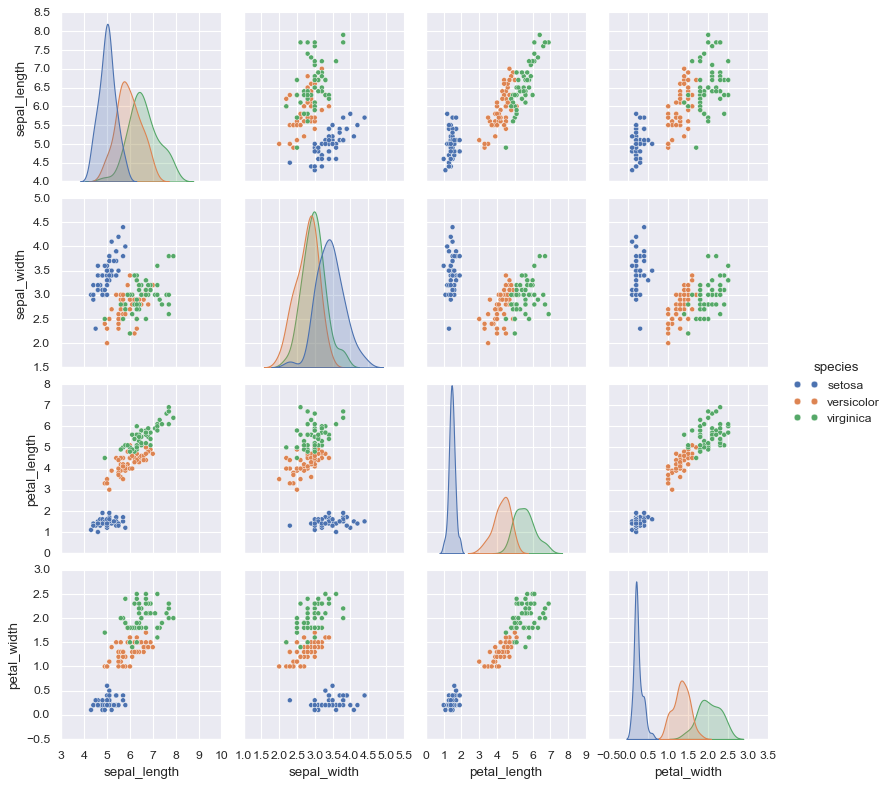

In [39]:
sns.pairplot(iris, hue='species', size=2.5);

#### Faceted histograms

In [40]:
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


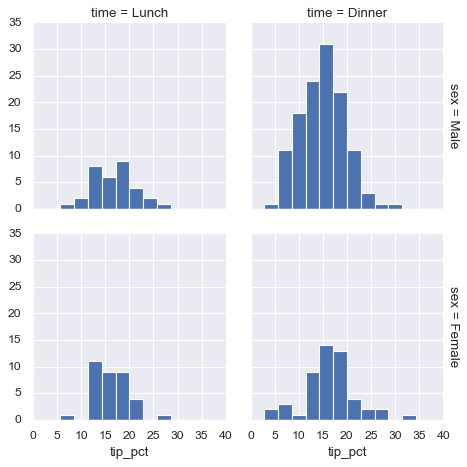

In [41]:
tips['tip_pct'] = 100 * tips['tip'] / tips['total_bill']

grid = sns.FacetGrid(tips, row="sex", col="time", margin_titles=True)
grid.map(plt.hist, "tip_pct", bins=np.linspace(0, 40, 15));

#### Factor plots

In [42]:
with sns.axes_style(style='ticks'):
    g = sns.factorplot("day", "total_bill", "sex", data=tips, kind="box")
    g.set_axis_labels("Day", "Total Bill");

AttributeError: module 'seaborn' has no attribute 'factorplot'

#### Join distributions

AttributeError: PolyCollection.set() got an unexpected keyword argument 'hue'

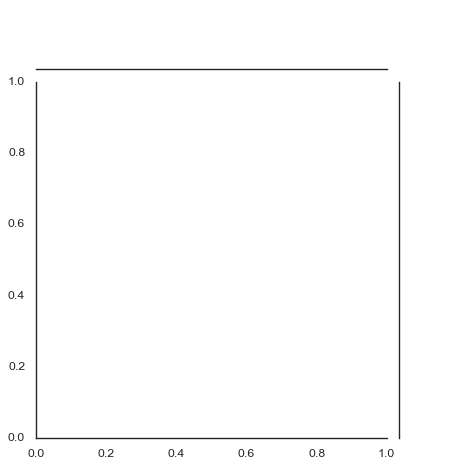

In [44]:
with sns.axes_style('white'):
    sns.jointplot("total_bill", "tip", data=tips, kind='hex')

TypeError: regplot() got an unexpected keyword argument 'hue'

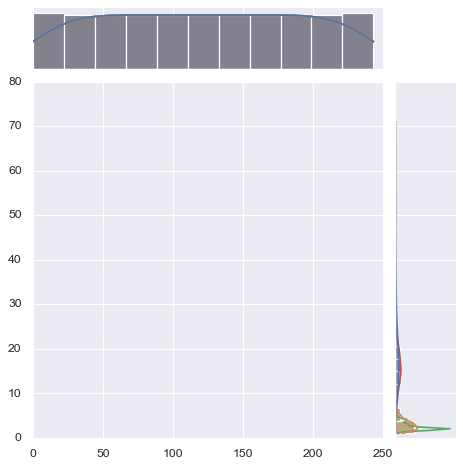

In [47]:
sns.jointplot("total_bill", data=tips, kind='reg');

#### Bar plots

In [48]:
planets = sns.load_dataset('planets')
planets.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


In [49]:
with sns.axes_style('white'):
    g = sns.factorplot("year", data=planets, aspect=2,
                       kind="count", color='steelblue')
    g.set_xticklabels(step=5)

AttributeError: module 'seaborn' has no attribute 'factorplot'

In [50]:
with sns.axes_style('white'):
    g = sns.factorplot("year", data=planets, aspect=4.0, kind='count',
                       hue='method', order=range(2001, 2015))
    g.set_ylabels('Number of Planets Discovered')

AttributeError: module 'seaborn' has no attribute 'factorplot'

### Example: Exploring Marathon Finishing Times

To load the data:

```python
data = pd.read_csv('https://belhavencs.nyc3.digitaloceanspaces.com/csc311/marathon-data.csv')
```

---

# Section 2: Exercises

In this section, you will be provided a few exercises to demonstrate your understanding of the chapter contents. Each exercise will have a Markdown section describing the problem, and you will provide cells below the description with code, comments and visual demonstrations of your solution.

---

### Problem 1



Use the 2014 Seattle precipitation data set:

https://belhavencs.nyc3.digitaloceanspaces.com/csc311/Seattle2014.csv

Provide line plots and histograms (4, 8, 52 bins) of the following columns over the time period provided in the data:
- `'PRCP'`
- `'SNWD'`
- `'SNOW'`

You should have two figures, one for line plots and one for histograms. 

---

### Problem 2

- Load in the following datasets:
    - https://belhavencs.nyc3.digitaloceanspaces.com/csc311/FremontBridge.csv
        - The `index_col` should be `'Date'`
        - `parse_dates` should be `True`
        - Resample to daily counts
        - Variable name: `daily`
        - Reset columns to `['west', 'east']`
    - https://belhavencs.nyc3.digitaloceanspaces.com/csc311/BicycleWeather.csv
        - The `index_col` should be `'DATE'`
        - `parse_dates` should be `True`
        - Variable name: `weather`
- Create columns in `daily`
    - `'total'`: equal to the counts for `df.east + df.west`
- Create two columns in `weather`
    - `temp_min`: minimum temperature each day in Fahrenheit
    - `temp_max`: maximum temperature each day in Fahrenheit
    - `temp`: average of `temp_min` and `temp_max`
    - `precip`: `'PRCP'` column (in 1/10mm) converted to inches
- Produce a figure with three axes (x-axis aligned)
    - Axis 1: Total rider count per day
    - Axis 2: Total precipitation per day
    - Axis 3: Average temperature per day